# Crimes Data in Israel (2019-2024)

#### by: Eden Shmuel, Oriana Feltzer

***

# Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import glob

Define Paths to Crime Datasets (2019–2024)

In [2]:
!git clone https://github.com/orifelszer/CrimeData.git

import os
import zipfile

zip_folder = 'CrimeData'

zip_files = [f for f in os.listdir(zip_folder) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(zip_folder, zip_file)
    extract_path = os.path.join(zip_folder, zip_file.replace('.zip', ''))

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted: {zip_file} -> {extract_path}")

fatal: destination path 'CrimeData' already exists and is not an empty directory.
Extracted: crimes2024.zip -> CrimeData/crimes2024
Extracted: crimes2019.zip -> CrimeData/crimes2019
Extracted: crimes2020.zip -> CrimeData/crimes2020
Extracted: crimes2023.zip -> CrimeData/crimes2023
Extracted: crimes2021.zip -> CrimeData/crimes2021
Extracted: crimes2022.zip -> CrimeData/crimes2022


In [3]:
csv_files = glob.glob("CrimeData/**/*.csv", recursive=True)
dataframes = {f"Crimes_{file[-8:-4]}": pd.read_csv(file) for file in csv_files}
print(f"Loaded {len(dataframes)} datasets successfully.")


Loaded 6 datasets successfully.


Load Crime Data into Pandas DataFrames

Preview 2019 Crime Data

In [4]:
dataframes['Crimes_2019'].head()

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700,עבירות כלפי הרכוש,715,גניבות אחרות
1,BA008B3B18529E6E4C831139FDA8B172,2019,Q4,510.0,כפר מנדא,10000000,מחוז צפון,15002736,מרחב גליל צפון,12401000,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600,עבירות כלפי המוסר,608,שמוש בסמים מסוכנים
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019,Q3,7000.0,לוד,40000000,מחוז מרכז,41200000,מרחב שפלה,41213000,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700,עבירות כלפי הרכוש,712,גניבה מתוך רכב
3,5843D35EBA3C57AADF22435516ACD203,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019,Q1,6900.0,כפר סבא,40000000,מחוז מרכז,41100000,מרחב שרון,41112000,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,723,גניבת חלקי רכב


In [5]:
combined_data = pd.concat(dataframes, axis=0, ignore_index=True)
combined_data

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700,עבירות כלפי הרכוש,715,גניבות אחרות
1,BA008B3B18529E6E4C831139FDA8B172,2019,Q4,510.0,כפר מנדא,10000000,מחוז צפון,15002736,מרחב גליל צפון,12401000,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600,עבירות כלפי המוסר,608,שמוש בסמים מסוכנים
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019,Q3,7000.0,לוד,40000000,מחוז מרכז,41200000,מרחב שפלה,41213000,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700,עבירות כלפי הרכוש,712,גניבה מתוך רכב
3,5843D35EBA3C57AADF22435516ACD203,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019,Q1,6900.0,כפר סבא,40000000,מחוז מרכז,41100000,מרחב שרון,41112000,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,723,גניבת חלקי רכב
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341168,BA52AC818358FA19FD7A9CB5DB60A42C,2022,Q2,3769.0,הר אדר,50000000,מחוז ירושלים,51200000,מרחב ציון ירושלים,51212000,תחנת הראל ציון,NaN,NaN,NaN,NaN,200,עבירות סדר ציבורי,206,איומים
2341169,059690968F6C2F1B81C5C53CCCEFBB5E,2022,Q3,3000.0,ירושלים,50000000,מחוז ירושלים,51200000,מרחב ציון ירושלים,51214000,תחנת לב הבירה ציון,NaN,NaN,30000832.0,מקור ברוך (מערב),700,עבירות כלפי הרכוש,715,גניבות אחרות
2341170,5E4A19D0471BA7E8FC1CD14B473DAD4F,2022,Q3,812.0,שלומי,80000000,מחוז חוף,15002761,מרחב אשר חוף,81501000,תחנת נהריה מחוז חוף,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,715,גניבות אחרות
2341171,304F64CF83DA884724D9217B2BE3800C,2022,Q3,195.0,קדימה צורן,40000000,מחוז מרכז,41100000,מרחב שרון,41118000,תחנת שדות שרון,NaN,NaN,1950001.0,NaN,700,עבירות כלפי הרכוש,719,גרימת נזק לרכוש בזדון


בדיקת חריגים לפני חלוקה לאימון ומבחן

In [6]:
# מבנה הנתונים
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341173 entries, 0 to 2341172
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FictiveIDNumber    object 
 1   Year               int64  
 2   Quarter            object 
 3   YeshuvKod          float64
 4   Yeshuv             object 
 5   PoliceDistrictKod  int64  
 6   PoliceDistrict     object 
 7   PoliceMerhavKod    int64  
 8   PoliceMerhav       object 
 9   PoliceStationKod   int64  
 10  PoliceStation      object 
 11  municipalKod       float64
 12  municipalName      object 
 13  StatisticAreaKod   float64
 14  StatisticArea      object 
 15  StatisticGroupKod  int64  
 16  StatisticGroup     object 
 17  StatisticTypeKod   int64  
 18  StatisticType      object 
dtypes: float64(3), int64(6), object(10)
memory usage: 339.4+ MB


In [7]:
# בדיקת הערכים החסרים
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FictiveIDNumber            0
Year                       0
Quarter                    0
YeshuvKod             310821
Yeshuv                310821
PoliceDistrictKod          0
PoliceDistrict             0
PoliceMerhavKod            0
PoliceMerhav               0
PoliceStationKod           0
PoliceStation              0
municipalKod         2161822
municipalName        2010942
StatisticAreaKod      860641
StatisticArea         960580
StatisticGroupKod          0
StatisticGroup             0
StatisticTypeKod           0
StatisticType              0
dtype: int64


In [8]:
# תיאור סטטיסטי של הנתונים
combined_data.describe()

,Year,YeshuvKod,PoliceDistrictKod,PoliceMerhavKod,PoliceStationKod,municipalKod,StatisticAreaKod,StatisticGroupKod,StatisticTypeKod
count,2.341173e+06,2.030352e+06,2.341173e+06,2.341173e+06,2.341173e+06,179351.000000,1.480532e+06,2.341173e+06,2.341173e+06
mean,2.021394e+03,4.687374e+03,3.905999e+07,3.158307e+07,3.699085e+07,35.749781,5.303095e+07,5.318704e+02,5.418855e+02
std,1.650468e+00,2.937389e+03,2.206618e+07,1.543080e+07,2.161290e+07,25.367089,2.742216e+07,8.647978e+02,8.669626e+02
min,2.019000e+03,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.100010e+05,-1.000000e+00,-1.000000e+00
25%,2.020000e+03,2.600000e+03,2.000000e+07,1.500522e+07,1.500571e+07,15.000000,3.000092e+07,2.000000e+02,2.120000e+02
50%,2.021000e+03,5.000000e+03,3.000000e+07,3.120000e+07,3.131300e+07,30.000000,5.000093e+07,4.000000e+02,4.040000e+02
75%,2.023000e+03,7.400000e+03,5.000000e+07,4.120000e+07,5.121000e+07,53.000000,7.700002e+07,7.000000e+02,7.150000e+02
max,2.024000e+03,9.800000e+03,8.000000e+07,7.150000e+07,8.170000e+07,100.000000,9.800000e+07,1.000000e+04,1.003900e+04


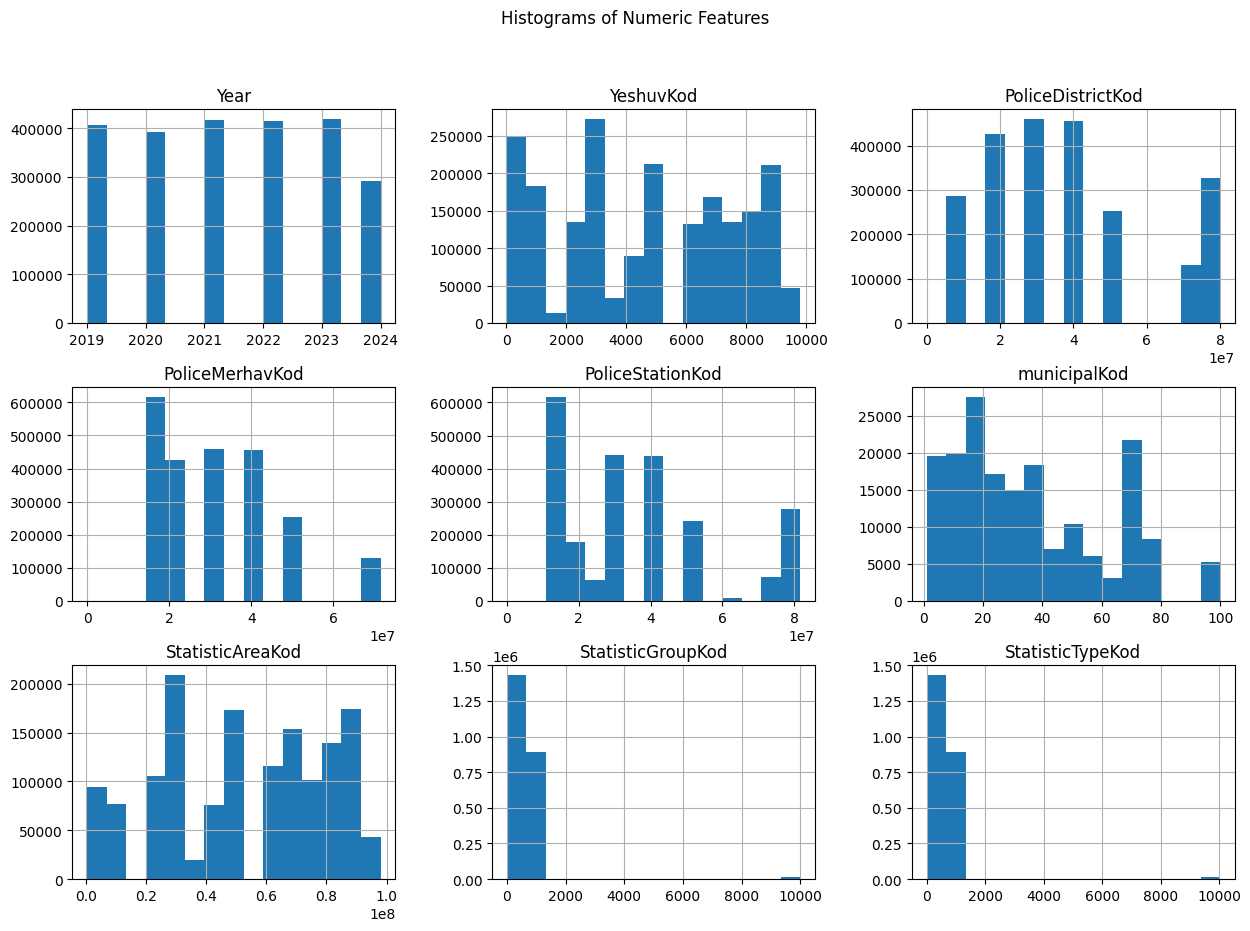

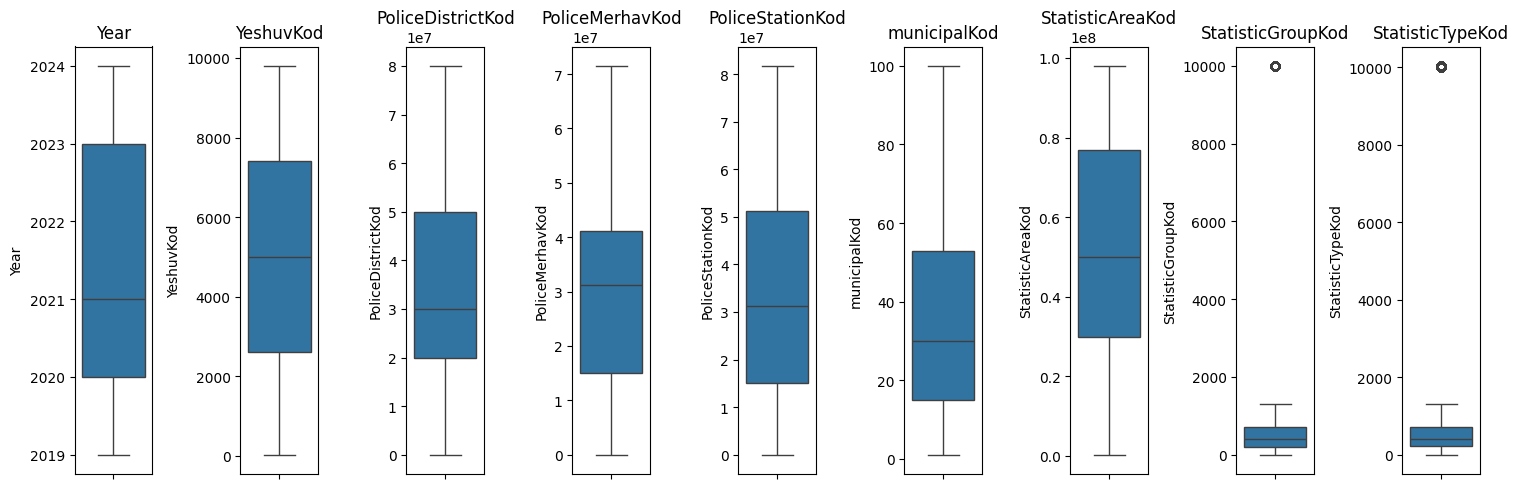

In [9]:
# התפלגות משתנים מספריים
numeric_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# יצירת היסטוגרמות
combined_data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# זיהוי חריגים עם Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [10]:
# זיהוי קטגוריות נדירות עבור StatisticGroup
rare_statistic_group = combined_data['StatisticGroup'].value_counts()
rare_statistic_group = rare_statistic_group[rare_statistic_group < 10]  # פחות מ-10 שורות

print("Rare categories in StatisticGroup:\n", rare_statistic_group)

Rare categories in StatisticGroup:
 Series([], Name: count, dtype: int64)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


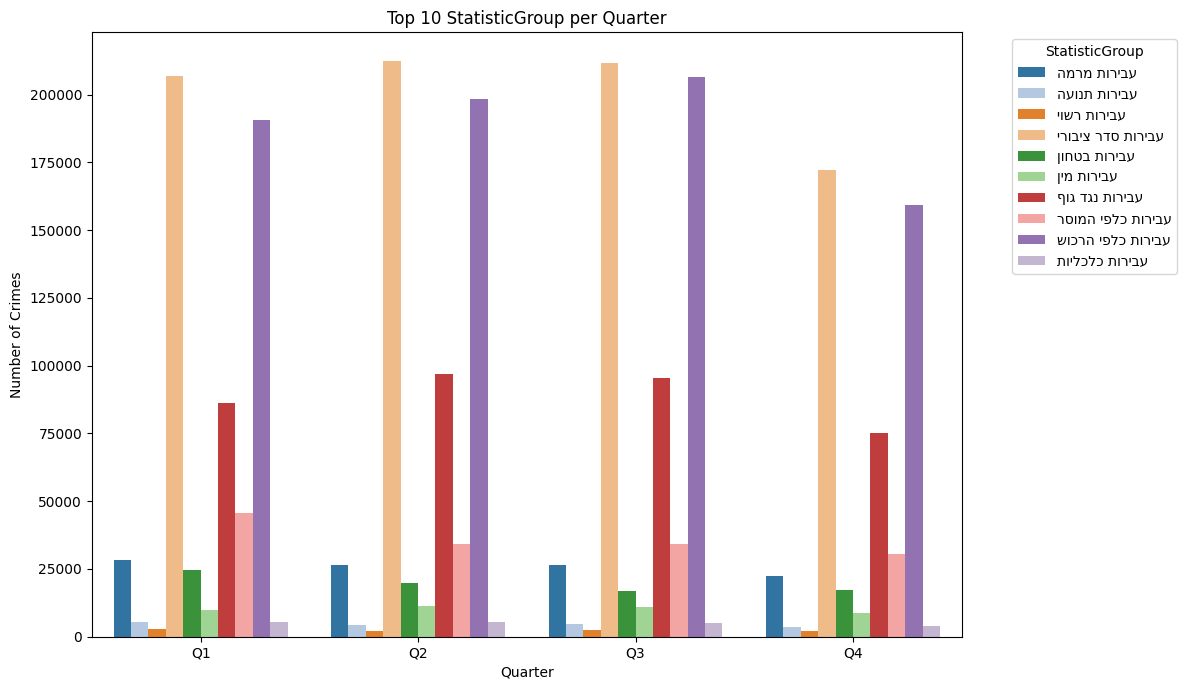

In [11]:
# התקנת פונט עברי בגוגל קולאב
!apt-get install -y fonts-freefont-ttf

# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# Find the top N StatisticType categories by count
top_N = 10  # Adjust N as needed
top_types = combined_data['StatisticGroup'].value_counts().head(top_N).index

# Filter the DataFrame to include only these top categories
filtered_df = combined_data[combined_data['StatisticGroup'].isin(top_types)].copy()

# Apply the reverse function only to the 'StatisticType' column
filtered_df['StatisticGroup'] = filtered_df['StatisticGroup'].apply(reverse_hebrew_text)

# Group data by quarter and StatisticType
crime_grouped = filtered_df.groupby(['Quarter', 'StatisticGroup']).size().reset_index(name='count')

# Plot the data
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 7))
sns.barplot(data=crime_grouped, x='Quarter', y='count', hue='StatisticGroup', palette='tab20')

# Add labels and titles
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.title(f'Top {top_N} StatisticGroup per Quarter')
plt.legend(title='StatisticGroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
# הסרת שורות עם ערך -1 בעמודת StatisticGroupKod
combined_data = combined_data[combined_data['StatisticGroupKod'] != -1]

In [14]:
# שמירת עמודות החיזוי
statistic_group = combined_data['StatisticGroup']
statistic_group_kod = combined_data['StatisticGroupKod']

# הסרת עמודות החיזוי מהנתונים
features = combined_data.drop(['StatisticGroup', 'StatisticGroupKod'], axis=1)

# חלוקה לסט אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(
    features,
    statistic_group,  # משתמשים רק ב-StatisticGroupKod כעמודת חיזוי
    test_size=0.2,
    random_state=42,
    stratify=statistic_group  # שומר על התפלגות הקטגוריות
)

# שמירת עמודת StatisticGroup (לשימוש אפשרי בעתיד)
y_train_text = statistic_group_kod.loc[X_train.index]
y_test_text = statistic_group_kod.loc[X_test.index]

In [15]:
def Preprocessing(datasets, train_mappings=None, scaler=None, fit_scaler=False):

    # חישוב מיפויים אם אין train_mappings
    if train_mappings is None:
        train_mappings = {
            'StatisticArea': datasets.dropna(subset=['StatisticArea']).set_index('StatisticAreaKod')['StatisticArea'].to_dict(),
            'Yeshuv': datasets.dropna(subset=['Yeshuv']).set_index('YeshuvKod')['Yeshuv'].to_dict()}

    # שימוש במיפויים למילוי ערכים חסרים
    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['StatisticAreaKod'].map(train_mappings['StatisticArea']))
    datasets['Yeshuv'] = datasets['Yeshuv'].fillna(datasets['YeshuvKod'].map(train_mappings['Yeshuv']))

    # מחיקת שורות עם ערכים חסרים ב"יישוב"
    datasets = datasets.dropna(subset=['Yeshuv'])

    #We will remove the columns "municipalKod" and "municipalName" because more than 85% of the data are missing values.
    columns_to_remove_85 = ['municipalKod', 'municipalName']
    datasets = datasets.drop(columns=columns_to_remove_85, errors='ignore')

    #We will remove StatisticTypeKod and 'StatisticType' because our target column is 'StatisticGroup" and 'StatisticType' belongs to 'StatisticGroup'.
    datasets = datasets.drop(columns=['StatisticTypeKod', 'StatisticType'], errors='ignore')

    #We attempted to fill the missing values in "StatisticArea" and "Yeshuv" using mappings, but this approach did not resolve the missing data.
    #Since the missing values in "StatisticArea" and "Yeshuv" could not be filled using their respective codes,
    #we decided to remove the columns "YeshuvKod" and "StatisticAreaKod" as they are no longer useful.
    columns_to_remove_after_fill = ['StatisticAreaKod', 'YeshuvKod']
    datasets = datasets.drop(columns=columns_to_remove_after_fill, errors='ignore')

    #We filled the missing values in each dataset's "StatisticArea" column by mapping the most common "StatisticArea" within each "PoliceDistrict".
    #Additionally, we added an indicator column, "is_missing_StatisticArea", to track rows where data was originally missing.

    datasets['is_missing_StatisticArea'] = datasets['StatisticArea'].isnull().astype(int)
    statistic_area_map = datasets.groupby('PoliceDistrict')['StatisticArea'].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['PoliceDistrict'].map(statistic_area_map))

    #We removed the columns "PoliceMerhavKod", "PoliceDistrictKod", and "PoliceStationKod" because they are either redundant, irrelevant to the analysis.
    columns_to_remove_redundant = ['PoliceMerhavKod', 'PoliceDistrictKod', 'PoliceStationKod', 'PoliceMerhav', 'PoliceDistrict', 'StatisticArea']
    datasets = datasets.drop(columns=columns_to_remove_redundant, errors='ignore')

    #We checked for duplicates using the 'FictiveIDNumber' column, which uniquely identifies complaints. We noticed some complaints sharing the same 'FictiveIDNumber'.
    #However, upon closer inspection, we found that these rows represent the same complainant reporting multiple charges in the StatisticGroup.
    #To handle this, we can apply one-hot encoding to the StatisticGroup column, allowing each charge to be represented as a separate feature.

    #Encoding the Data
    categorical_columns = ['Yeshuv', 'PoliceStation']
    data_encoded = pd.get_dummies(datasets, columns=categorical_columns, drop_first=True)

    #Removing the duplicaite rows
    data_encoded = data_encoded.drop_duplicates()

    #Feature Engineering
    data_encoded['Quarter_numeric'] = data_encoded['Quarter'].str.extract('(\d)').astype(int)
    data_encoded['Quarter_sin'] = np.sin(2 * np.pi * data_encoded['Quarter_numeric'] / 4)
    data_encoded['Quarter_cos'] = np.cos(2 * np.pi * data_encoded['Quarter_numeric'] / 4)

    data_encoded['YeshuvCrimeRate'] = datasets.groupby('Yeshuv')['Yeshuv'].transform('count')
    data_encoded['CrimeTrend'] = data_encoded.groupby('Year')['Year'].transform('count')

    # נרמול ערכים מספריים
    numeric_columns = ['YeshuvCrimeRate', 'CrimeTrend']
    if scaler is None:
        scaler = MinMaxScaler()
    if fit_scaler:
        data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])
    else:
        data_encoded[numeric_columns] = scaler.transform(data_encoded[numeric_columns])

    #Now we can remove the ID column
    data_encoded = data_encoded.drop(columns=['FictiveIDNumber','Quarter'], errors='ignore')

    return data_encoded, train_mappings, scaler

In [16]:
# ניקוי סט האימון ויצירת מיפויים
X_train_cleaned, train_mappings, scaler = Preprocessing(X_train, fit_scaler=True)

# ניקוי סט הבדיקה תוך שימוש במיפויים שנוצרו בסט האימון
X_test_cleaned, _, _ = Preprocessing(X_test, train_mappings=train_mappings, scaler=scaler)

In [17]:
# הגדרת עמודות לשמירה על בסיס סט האימון בלבד
columns_to_keep = [col for col in X_train_cleaned.columns if X_train_cleaned[col].sum() >= 10]

# שמירה על עמודות אימון רלוונטיות בלבד
X_train_cleaned = X_train_cleaned[columns_to_keep]

# התאמת סט המבחן רק לפי מה שנקבע באימון
for col in columns_to_keep:
    if col not in X_test_cleaned.columns:
        X_test_cleaned[col] = 0

# הבטחה ששני הסטים באותו סדר עמודות
X_test_cleaned = X_test_cleaned[X_train_cleaned.columns]

In [18]:
# נתונים לעבודה
X_train = X_train_cleaned
X_test = X_test_cleaned


In [19]:
# התאמת אינדקסים
y_train = y_train.loc[X_train_cleaned.index]
y_test = y_test.loc[X_test_cleaned.index]

In [20]:
X_test

,Year,is_missing_StatisticArea,Yeshuv_אבו סנאן,Yeshuv_אבן יהודה,Yeshuv_אולפני נווה אילן,Yeshuv_אום אל-פחם,Yeshuv_אופקים,Yeshuv_אור יהודה,Yeshuv_אור עקיבא,Yeshuv_אורנית,...,PoliceStation_תחנת שלם קדם,PoliceStation_תחנת שפט קדם,PoliceStation_תחנת שפרעם גליל צפון,PoliceStation_תחנת שרת מרחב איילון החדש,PoliceStation_תחנת תא צפון ירקון,PoliceStation_תחנת תבור צפון,PoliceStation_תחנת תל אביב דרום איילון החדש,Quarter_numeric,YeshuvCrimeRate,CrimeTrend
994870,2020,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0.005522,-1.348103
636720,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,0.001317,-1.302342
2182436,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,0.006280,-1.302592
1859018,2024,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2,0.020746,-1.586483
661979,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0.030701,-1.302342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966711,2022,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,0.008044,-1.302592
144537,2019,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0.013754,-1.300714
969441,2020,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4,0.039821,-1.348103
318890,2019,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,4,0.038657,-1.300714


*****